In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

## Definition:

It is graph that plots the quantity of two goods along its axis. A line is then drawn that goes through all possible combinations of those two goods that the individual can produce. he relationship shown in the PPC stems from the Opportunity Cost, which describes how by increasing the resources put into the creation of one good you necessarily decrease the resources put into another.

I think finding the correlation between two variables is the right step in determining what their eventual PPC curve will look like, however we must keep in mind that the line of best fit is not the actual PPC it is only a sign that there does appear to be a decrease in one good as another increases.

## Starting with Correlation between Limited Resources

In [9]:
DatabaseDF.head()

Unnamed: 0    Operator Well Name Formation  Lateral Length  Stages  \
0           0  Operator 1    Well 1       MBH          5114.0    30.0   
1           1  Operator 2    Well 2       MBH          5181.0     NaN   
2           2  Operator 2    Well 3       MBH          4780.0    15.0   
3           3  Operator 1    Well 4       MBH         10654.0     1.0   
4           4  Operator 2    Well 5       MBH          5209.0     1.0   

   Township   Range  Section  Total Prop, lbs  ...  Fluid Type from DI  \
0        141     99       10              0.0  ...                 NaN   
1        142     99       16         418000.0  ...                 NaN   
2        142     99       24         568407.0  ...                 NaN   
3        142     99        1         845000.0  ...                 NaN   
4        142     99       35         297366.0  ...                 NaN   

  SPACING_CAPPED  12 month Cum Prod  Completion Type  Sleeves  P&P  \
0          660.0              33.55              NaN      NaN  NaN   
1          660.0              27.62              NaN      NaN  NaN   
2          660.0              11.19               OH      NaN  NaN   
3          660.0              27.85              NaN      NaN  NaN   
4          660.0              50.88               OH      NaN  NaN   

   Frac Ports Repeater Ports  CT  Year Drilled  
0         NaN            NaN NaN        2006.0  
1         NaN            NaN NaN        2005.0  
2         NaN            NaN NaN        2006.0  
3         NaN            NaN NaN        2007.0  
4         NaN            NaN NaN        2006.0  

[5 rows x 30 columns]

In [12]:
from scipy.stats import spearmanr
corr, _ = spearmanr(DatabaseDF['12 month Cum Prod'], DatabaseDF['Total Prop, lbs'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.440


In [15]:
from scipy.stats import pearsonr
corr, _ = pearsonr(DatabaseDF['Total Prop, lbs'], DatabaseDF['12 month Cum Prod'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: 0.481


In [18]:
Y = DatabaseDF['Total Prop, lbs']
X = DatabaseDF['12 month Cum Prod']

In [ ]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)


# plot points and fit line
'''
#already imported
import matplotlib.pyplot as plt
'''
sns.scatterplot(x = '12 month Cum Prod', y = 'Total Prop, lbs', hue = '12 month Cum Prod',data = DatabaseDF)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
# Build PPC Model based on negative correlations on the tested correlation types
# Pearson Correlation strong negative correlation between the Longitude and Range

#### Although, this may not be the best, Total prop, lbs is a limiting resource yet shows a positive correlation with the 12 month cumulative production. Therefore, total propant may not be the best source for this PPF graph. 

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [41]:
mean_absolute_error(X, yfit)

3331970.7391864895

In [42]:
mean_squared_error(X, yfit)

12394871525366.371

In [43]:
DatabaseDF['SPACING_CAPPED'] = DatabaseDF['SPACING_CAPPED'].fillna(0)

In [44]:
X = DatabaseDF['12 month Cum Prod']
Y = DatabaseDF['SPACING_CAPPED']

best fit line:
y = 623.95 + -0.28x


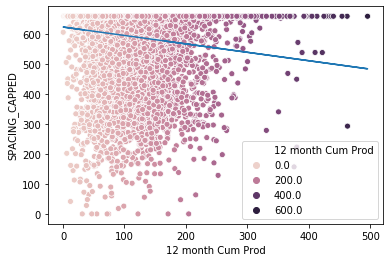

In [45]:


# solution
a, b = best_fit(X, Y)


# plot points and fit line
'''
#already imported
import matplotlib.pyplot as plt
'''
sns.scatterplot(x = '12 month Cum Prod', y = 'SPACING_CAPPED', hue = '12 month Cum Prod',data = DatabaseDF)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
# see the best line fit near the most cum production

We can see that the dots near the best fit have optimal oil production. ~~This is taking two negative correlated features, Longitude and Latitude.~~

This is very interesting and deservs its own notebook to check why that is

In [34]:
corr, _ = spearmanr(DatabaseDF['12 month Cum Prod'], DatabaseDF['SPACING_CAPPED'])
print('Spearmans correlation: %.3f' % corr)
corr, _ = pearsonr(DatabaseDF['12 month Cum Prod'], DatabaseDF['SPACING_CAPPED'])
print('Pearson correlation: %.3f' % corr)

Spearmans correlation: -0.246
Pearson correlation: -0.136


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [48]:
mean_squared_error(X, yfit) # Using different errors to understand where our model stands

252688.46867105947

In [49]:
mean_absolute_error(X, yfit)

497.87000727738314

In [54]:
DatabaseDF['CT'] = DatabaseDF['CT'].fillna(0)

In [61]:
DatabaseDF['P&P'] = DatabaseDF['P&P'].fillna(0)

best fit line:
y = 5.55 + 0.08x


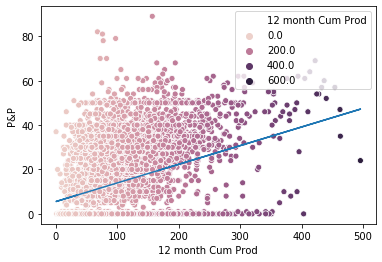

In [62]:
X = DatabaseDF['12 month Cum Prod']
Y = DatabaseDF['P&P']

# solution
a, b = best_fit(X, Y)


# plot points and fit line
import matplotlib.pyplot as plt
sns.scatterplot(x = '12 month Cum Prod', y = 'P&P', hue = '12 month Cum Prod',data = DatabaseDF)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
# see the best line fit near the most cum production

In [79]:
corr, _ = spearmanr(DatabaseDF['12 month Cum Prod'], DatabaseDF['P&P'])
print('Spearmans correlation: %.3f' % corr)
corr, _ = pearsonr(DatabaseDF['12 month Cum Prod'], DatabaseDF['P&P'])
print('Pearson correlation: %.3f' % corr)

Spearmans correlation: 0.255
Pearson correlation: 0.281


best fit line:
y = 5354147.31 + -3391.10x


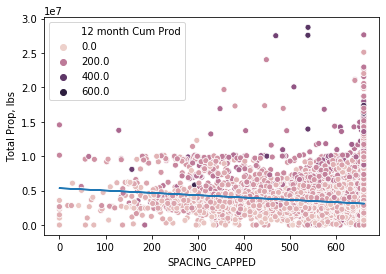

In [72]:
X = DatabaseDF['SPACING_CAPPED']
Y = DatabaseDF['Total Prop, lbs']

# solution
a, b = best_fit(X, Y)


# plot points and fit line
import matplotlib.pyplot as plt
sns.scatterplot(x = 'SPACING_CAPPED', y = 'Total Prop, lbs', hue = '12 month Cum Prod', data = DatabaseDF)
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
# see the best line fit near the most cum production

In [81]:
corr, _ = spearmanr(DatabaseDF['Total Prop, lbs'], DatabaseDF['SPACING_CAPPED'])
print('Spearmans correlation: %.3f' % corr)
corr, _ = pearsonr(DatabaseDF['Total Prop, lbs'], DatabaseDF['SPACING_CAPPED'])
print('Pearson correlation: %.3f' % corr)

Spearmans correlation: -0.278
Pearson correlation: -0.161


I have found some correlations between features that are limited resources. I have committed this notebook for right now but there is more research that needs to be done over the certain limited features. This includes lateral length, spacing capped, fluid, and total proppant. This notebook will be updated with that information soon. 

Review 2: I think that PPC is interesting because it shows that the cumulative production is strongly associated with some of the limiting resources, and that is something that we can delve more into towards the end of the first sprint and beginning of the second sprint. I think that this model would be useful for our end goal of feature selection because it provides clear results with numerical values that represent how correlated two features are and how high the error of the model is, which is extremely helpful with deciding how to continue with dimensionality reduction. There are still more relationships to look at within the dataset, but so far it seems like this model has potential and is worth looking into during the second sprint.

Clear Definition - B
Shown Corr - A
Shown Error - A
Potential - A
Excitement - B
